# Analysis of the naive algorithm


In [2]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [8]:
dfnaive = pd.read_csv('data/naivescores2019-01-03T1641.csv')
dfnaive = dfnaive.replace(-1.00, np.nan)
dfnaive = dfnaive.sort_values(by=['block_number']) 

In [9]:
def stats(df):
    df['priceGweiStandard'] = df['priceStandard'].apply(lambda x: x/1e9)
    avg_gaspricestandard = df["priceGweiStandard"].mean()
    std_gaspricestandard = df["priceGweiStandard"].std()
    print("The average standard gas price is: " + str(avg_gaspricestandard) + " GWei. std: " + str(std_gaspricestandard))


print("\n############### naive ###################")
stats(dfnaive)


############### naive ###################
The average standard gas price is: 4.247490648328032 GWei. std: 2.3065578222561998


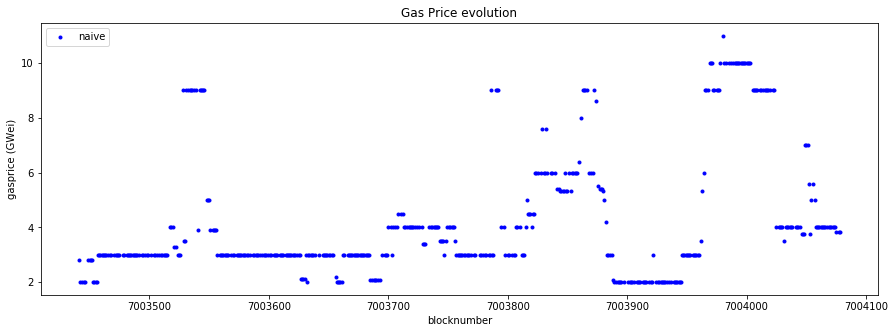

In [10]:
import matplotlib.pyplot as plt

x2 = dfnaive["block_number"].values
y2 = dfnaive["priceGweiStandard"].values


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(x2,y2, c='b', marker='.', label='naive')

plt.xlabel('blocknumber')
plt.ylabel('gasprice (GWei)')
plt.title('Gas Price evolution')
plt.legend(loc=2)

In [12]:
def getPercentage(cols):
    minScore = dfnaive[cols].min(axis=1)
    numberOfBlocks = minScore.count()
    numberOfBlocksWithoutInclusion = minScore.value_counts().get(100.000, None)
    if numberOfBlocksWithoutInclusion is None:
        numberOfBlocksWithoutInclusion = 0
    percentage = (100 / numberOfBlocks) * numberOfBlocksWithoutInclusion
    print(percentage)
    return percentage

26.095617529880478
9.760956175298805
4.780876494023904
2.589641434262948
1.195219123505976
1.195219123505976
0.9960159362549801
0.597609561752988
0.398406374501992
0.199203187250996


Text(0.5, 1.0, 'naive prediction \n percentage not included in next 10 blocks')

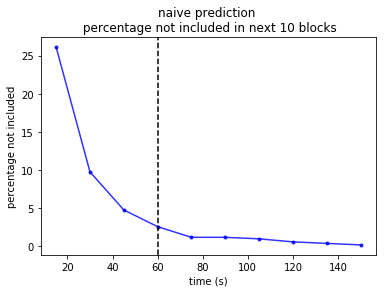

In [13]:
x = []
y = []
avg_blocktime = 15.0
cols = []
for idx in range(1, 11, 1):
    cols.append("scoreStandardPlus" + str(idx))
    percentage = getPercentage(cols)
    y.append(percentage)
    x.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, alpha=0.8, c='b', marker='.')
plt.axvline(x=60.0, color='k', linestyle='--')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('naive prediction \n percentage not included in next 10 blocks')